# Predicting variation in EUR/USD exchange rate

In [7]:
#set the working directory
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")

#check
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [8]:
import pandas as pd
#load the data
df_merged = pd.read_csv("results/sentiment_ecb_pricing.csv.gz", compression="gzip")
df_merged

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,2008-10-10,1.3579,1.3682,-0.752814,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,...,-0.3818,0.0000,0.0,0.187700,0.4404,0.4588,0.017700,21.0629,1341,0.420350
1,2008-10-22,1.2843,1.3184,-2.586468,1.32724,1.34639,1.439462,1.501832,1.321379,1.341512,...,-0.2732,0.0000,0.0,0.045150,0.4019,0.5339,0.023237,29.1390,1396,0.418754
2,2008-10-28,1.2526,1.2460,0.529695,1.26470,1.30379,1.419718,1.492402,1.268561,1.295142,...,-0.2960,0.0000,0.0,0.086125,0.3818,0.4588,0.023811,30.5499,1420,0.418267
3,2008-11-04,1.2820,1.2822,-0.015598,1.28408,1.27439,1.400155,1.481216,1.281136,1.287815,...,-0.1531,-0.4939,0.0,0.000000,0.3696,0.4588,0.019051,24.8429,1438,0.419620
4,2008-12-03,1.2623,1.2697,-0.582815,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,...,-0.3804,-0.0772,0.0,0.025800,0.3612,0.4939,0.007131,10.3467,1569,0.415225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,2022-07-11,1.0098,1.0163,-0.639575,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,-0.3182,-0.0258,0.0,0.254270,0.4215,0.6997,0.038178,5084.5548,133180,0.483039
3423,2022-07-12,1.0042,1.0098,-0.554565,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,-0.3182,-0.0258,0.0,0.250620,0.4215,0.6996,0.037950,5072.9794,133677,0.482985
3424,2022-07-13,1.0067,1.0042,0.248954,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,-0.3182,-0.0258,0.0,0.250000,0.4215,0.6996,0.037539,5034.2551,134107,0.483008
3425,2022-07-14,1.0005,1.0067,-0.615874,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,...,-0.3182,-0.0258,0.0,0.250000,0.4215,0.6996,0.036937,4973.2012,134641,0.483205


Subset the dataframe with analysis data selecting only predictors

In [9]:
df_merged_modeling = df_merged.drop(["date", "eur_usd_rate", "percent_change_pricing", "previous_eur_pricing"], inplace=False, axis=1)
df_merged_modeling

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_neg_sent,quantile_0.25_neg_sent,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,1.456771,1.486482,-0.49390,-0.2616,...,-0.3818,0.0000,0.0,0.187700,0.4404,0.4588,0.017700,21.0629,1341,0.420350
1,1.32724,1.34639,1.439462,1.501832,1.321379,1.341512,1.429507,1.468355,-0.29634,0.0000,...,-0.2732,0.0000,0.0,0.045150,0.4019,0.5339,0.023237,29.1390,1396,0.418754
2,1.26470,1.30379,1.419718,1.492402,1.268561,1.295142,1.408270,1.454891,-0.38040,-0.3804,...,-0.2960,0.0000,0.0,0.086125,0.3818,0.4588,0.023811,30.5499,1420,0.418267
3,1.28408,1.27439,1.400155,1.481216,1.281136,1.287815,1.389191,1.441230,-0.13660,0.0000,...,-0.1531,-0.4939,0.0,0.000000,0.3696,0.4588,0.019051,24.8429,1438,0.419620
4,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959,-0.60570,-0.2049,...,-0.3804,-0.0772,0.0,0.025800,0.3612,0.4939,0.007131,10.3467,1569,0.415225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,-0.73806,-0.4215,...,-0.3182,-0.0258,0.0,0.254270,0.4215,0.6997,0.038178,5084.5548,133180,0.483039
3423,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,-0.75060,-0.3400,...,-0.3182,-0.0258,0.0,0.250620,0.4215,0.6996,0.037950,5072.9794,133677,0.482985
3424,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,-0.71605,-0.4404,...,-0.3182,-0.0258,0.0,0.250000,0.4215,0.6996,0.037539,5034.2551,134107,0.483008
3425,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439,-0.62490,-0.3612,...,-0.3182,-0.0258,0.0,0.250000,0.4215,0.6996,0.036937,4973.2012,134641,0.483205


You can use the relative difference and other metrics of change of pricing.

In [10]:
y = df_merged["percent_change_pricing"].values
X = df_merged_modeling.values
print(y)
print(X)

[-0.75281392 -2.58646845  0.52969502 ...  0.24895439 -0.61587365
  0.53973013]
[[1.36516000e+00 1.38728000e+00 1.47044667e+00 ... 2.10629000e+01
  1.34100000e+03 4.20350452e-01]
 [1.32724000e+00 1.34639000e+00 1.43946167e+00 ... 2.91390000e+01
  1.39600000e+03 4.18754044e-01]
 [1.26470000e+00 1.30379000e+00 1.41971833e+00 ... 3.05499000e+01
  1.42000000e+03 4.18267337e-01]
 ...
 [1.01100000e+00 1.02284000e+00 1.05300667e+00 ... 5.03425510e+03
  1.34107000e+05 4.83007889e-01]
 [1.00750000e+00 1.01902000e+00 1.05153667e+00 ... 4.97320120e+03
  1.34641000e+05 4.83205053e-01]
 [1.00542000e+00 1.01536000e+00 1.05027333e+00 ... 4.94371740e+03
  1.35070000e+05 4.83317713e-01]]


In [11]:
df_merged_modeling.columns

Index(['5_days_rolling_mean_pricing', '10_days_rolling_mean_pricing',
       '60_days_rolling_mean_pricing', '120_days_rolling_mean_pricing',
       '5_days_exp_rolling_mean_pricing', '10_days_exp_rolling_mean_pricing',
       '60_days_exp_rolling_mean_pricing', '120_days_exp_rolling_mean_pricing',
       'quantile_0.1_neg_sent', 'quantile_0.25_neg_sent',
       'quantile_0.35_neg_sent', 'quantile_0.50_neg_sent',
       'quantile_0.65_neg_sent', 'quantile_0.75_neg_sent',
       'quantile_0.9_neg_sent', 'mean_neg_sent', 'sum_neg_sent',
       'count_neg_sent', 'std_neg_sent', 'quantile_0.1_5_days_moving_neg_sent',
       'quantile_0.25_5_days_moving_neg_sent',
       'quantile_0.35_5_days_moving_neg_sent',
       'quantile_0.50_5_days_moving_neg_sent',
       'quantile_0.65_5_days_moving_neg_sent',
       'quantile_0.75_5_days_moving_neg_sent',
       'quantile_0.9_5_days_moving_neg_sent', 'mean_5_days_moving_neg_sent',
       'sum_5_days_moving_neg_sent', 'count_5_days_moving_neg_sent'

In [12]:
predictors_null_model_array = df_merged_modeling.drop(df_merged_modeling.columns[["neg_sent" in column for column in df_merged_modeling.columns]], inplace=False, axis=1)
predictors_null_model_array

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,1.456771,1.486482
1,1.32724,1.34639,1.439462,1.501832,1.321379,1.341512,1.429507,1.468355
2,1.26470,1.30379,1.419718,1.492402,1.268561,1.295142,1.408270,1.454891
3,1.28408,1.27439,1.400155,1.481216,1.281136,1.287815,1.389191,1.441230
4,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959
...,...,...,...,...,...,...,...,...
3422,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113
3423,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875
3424,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699
3425,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439


In [13]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#DECISION TREEE WORKS MUCH BETTER THAN RIDGE!
    #random forest works better with correlated predictors?

null_model_raw = RandomForestRegressor()
full_model_raw = RandomForestRegressor()
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [14]:
#se parameters of the model
null_model_raw.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [15]:
from sklearn import metrics

#see the metrics that can be used in GridSearch
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [16]:
'''
##use gridsearch to optimize the parameters of the model
#make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

#make a dict with the parameters and values to be explored
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
params={"max_depth" : [1,5,9,12]}

#shuffle
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25)
    #CHECK IN MORE DETAIL
    #This seems to be equivalent to: 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        #But, it is usable for GridSearchCV
       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy

#prepare the gridsearch with the pipe across these parameter values using 3 cores
search_1 = GridSearchCV(null_model_raw, params, n_jobs=8, cv=shuffle_split, scoring="r2")
search_2 = GridSearchCV(full_model_raw, params, n_jobs=8, cv=shuffle_split, scoring="r2")
#search = RandomizedSearchCV(pipe_att, params, n_iter=20, cv=shuffle_split, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
    #we can use random search if we have many parameters, so the total number of combinations of all parameters
        #will be veery high
        #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #for scoring options
        #sklearn.metrics.SCORERS.keys())
        
#make the search for out data
search_1.fit(X=predictors_null_model_array, y=y)
search_2.fit(X=X, y=y)

#print the best score and parameters
print("Best parameter null model (CV score=%0.3f):" % search_1.best_score_)
print(search_1.best_params_)
print("Best parameter full model (CV score=%0.3f):" % search_2.best_score_)
print(search_2.best_params_)
'''

'\n##use gridsearch to optimize the parameters of the model\n#make imports\nfrom sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit\n\n#make a dict with the parameters and values to be explored\n    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/\n    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74\nparams={"max_depth" : [1,5,9,12]}\n\n#shuffle\nshuffle_split = ShuffleSplit(n_splits=5, test_size=0.25)\n    #CHECK IN MORE DETAIL\n    #This seems to be equivalent to: \n        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\n        #But, it is usable for GridSearchCV\n       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy\n\n#prepare the gridsearch with the pipe across these parameter values using 3 cores\nsearch_1 = GridSearchCV(null_mod

For now we are not using the GridSearch, we will explore this in the future

Let's see the coefficients (importance of each predictor)

In [17]:
#print(ridge_model_1.feature_importances_)
#print(ridge_model_2.feature_importances_)

In [18]:
null_model = RandomForestRegressor(random_state=565735)
full_model = RandomForestRegressor(random_state=565735)

null_model.fit(X=predictors_null_model_array, y=y)
full_model.fit(X=X, y=y)

RandomForestRegressor(random_state=565735)

In [19]:
df_merged_modeling.columns

Index(['5_days_rolling_mean_pricing', '10_days_rolling_mean_pricing',
       '60_days_rolling_mean_pricing', '120_days_rolling_mean_pricing',
       '5_days_exp_rolling_mean_pricing', '10_days_exp_rolling_mean_pricing',
       '60_days_exp_rolling_mean_pricing', '120_days_exp_rolling_mean_pricing',
       'quantile_0.1_neg_sent', 'quantile_0.25_neg_sent',
       'quantile_0.35_neg_sent', 'quantile_0.50_neg_sent',
       'quantile_0.65_neg_sent', 'quantile_0.75_neg_sent',
       'quantile_0.9_neg_sent', 'mean_neg_sent', 'sum_neg_sent',
       'count_neg_sent', 'std_neg_sent', 'quantile_0.1_5_days_moving_neg_sent',
       'quantile_0.25_5_days_moving_neg_sent',
       'quantile_0.35_5_days_moving_neg_sent',
       'quantile_0.50_5_days_moving_neg_sent',
       'quantile_0.65_5_days_moving_neg_sent',
       'quantile_0.75_5_days_moving_neg_sent',
       'quantile_0.9_5_days_moving_neg_sent', 'mean_5_days_moving_neg_sent',
       'sum_5_days_moving_neg_sent', 'count_5_days_moving_neg_sent'

In [20]:
from sklearn import metrics

null_model_pred = null_model.predict(X=predictors_null_model_array)
full_model_pred = full_model.predict(X=X)

In [21]:
print("Null model: Mean absolute error:", metrics.mean_absolute_error(y, null_model_pred))
print("Null model: Mean squared error:", metrics.mean_squared_error(y, null_model_pred))
print("Null model: Root mean squared error:", metrics.mean_squared_error(y, null_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Null model: R^2:", metrics.r2_score(y, null_model_pred))
    #0.83

Null model: Mean absolute error: 0.16689035482800313
Null model: Mean squared error: 0.04991015601965638
Null model: Root mean squared error: 0.22340581017434702
Null model: R^2: 0.8350338893658235


In [22]:
print("Full model: Mean absolute error:", metrics.mean_absolute_error(y, full_model_pred))
print("Full model: Mean squared error:", metrics.mean_squared_error(y, full_model_pred))
print("Full model: Root mean squared error:", metrics.mean_squared_error(y, full_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Full model: R^2:", metrics.r2_score(y, full_model_pred))

Full model: Mean absolute error: 0.15799643690797074
Full model: Mean squared error: 0.04607398690568242
Full model: Root mean squared error: 0.21464851945839836
Full model: R^2: 0.8477134309448561


In [23]:
(metrics.r2_score(y, full_model_pred) - metrics.r2_score(y, null_model_pred))*100
    #1.79

1.2679541579032616

<AxesSubplot:>

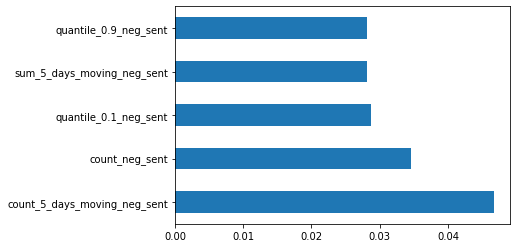

In [28]:
feat_importances = pd.Series(full_model.feature_importances_, index=df_merged_modeling.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
##MAKE INTERACTIVE PLOT SELECTING THE SIZE OF THE TIME WINDOW?

from matplotlib.pyplot import figure
figure(figsize=(30,10), dpi=80)

#plot scatter against date and eur pricing
plt.plot(df_merged["date"], df_merged["percent_change_pricing"], label="% change EUR/USD ratio", linewidth=0.5)
plt.plot(df_merged["date"], null_model_pred, label="Null model", linewidth=0.5)
plt.plot(df_merged["date"], full_model_pred, label="Twitter augmented model", linewidth=0.5)

#show legend
plt.legend()

#close
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=null_model_pred, y=y, s=0.5)
plt.title("Null model")
plt.xlabel("Predicted % change")
plt.ylabel("Observed % change")

In [ ]:
plt.scatter(x=full_model_pred, y=y, s=0.5)
plt.title("Full model (Twitter augmented)")
plt.xlabel("Predicted % change")
plt.ylabel("Observed % change")

Let's calculate the different in R2 between the two models in percentage:

### Next steps

- check moving averages
- Try to reach R2 of 0.9 modifying only twitter variables, so the model improving is only the twitter augumented
- Cross validation and parameter optimization
    - Compare RMSE between models in the evaluation datasets!!!
    - Avoid overfitting! You can sue many predictors, but use CV to avoid overftting!
- Include previous sentiment, this could be more useful for prediction? we do not need current sentiment...
    - Robert said to use the sentiment of the last week, month..
- Improve definition of the base model
- Try more models?
    - time series?
        - ARIMA considers shocks!
    - ensemble of random forest?
- Extend to other currencies?